In [1]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
import numpy as np  
import pandas as pd

df11 = pd.read_csv('subject101.csv',delimiter=',')
df12 = pd.read_csv('subject102.csv',delimiter=',')
df13 = pd.read_csv('subject103.csv',delimiter=',')
df14 = pd.read_csv('subject104.csv',delimiter=',')
df15 = pd.read_csv('subject105.csv',delimiter=',')
df16 = pd.read_csv('subject106.csv',delimiter=',')
df17 = pd.read_csv('subject107.csv',delimiter=',')
df18 = pd.read_csv('subject108.csv',delimiter=',')
df19 = pd.read_csv('subject109.csv',delimiter=',')
df21 = pd.read_csv('subject201.csv',delimiter=',')
df25 = pd.read_csv('subject205.csv',delimiter=',')
df26 = pd.read_csv('subject206.csv',delimiter=',')
df28 = pd.read_csv('subject208.csv',delimiter=',')
df29 = pd.read_csv('subject209.csv',delimiter=',')
df = pd.concat([df11,df12,df13,df14,df15,df16,df17,df18,df19,df21,df25,df26,df28,df29])
from sklearn.model_selection import train_test_split
X = df.iloc[:,2:]
y = df.iloc[:,1]
X = np.array(X)
y = np.array(y)
y = label_binarize(y, classes=[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2, shuffle = True,stratify=y)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,), random_state=1)
classifier = OneVsRestClassifier(clf)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
print("misclassification")
print(1-classifier.score(X_test,y_test))

misclassification
0.12797459040608006


In [2]:
classes=[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[classes[i]], tpr[classes[i]], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[classes[i]] = auc(fpr[classes[i]], tpr[classes[i]])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[classes[i]] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[classes[i]], tpr[classes[i]])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

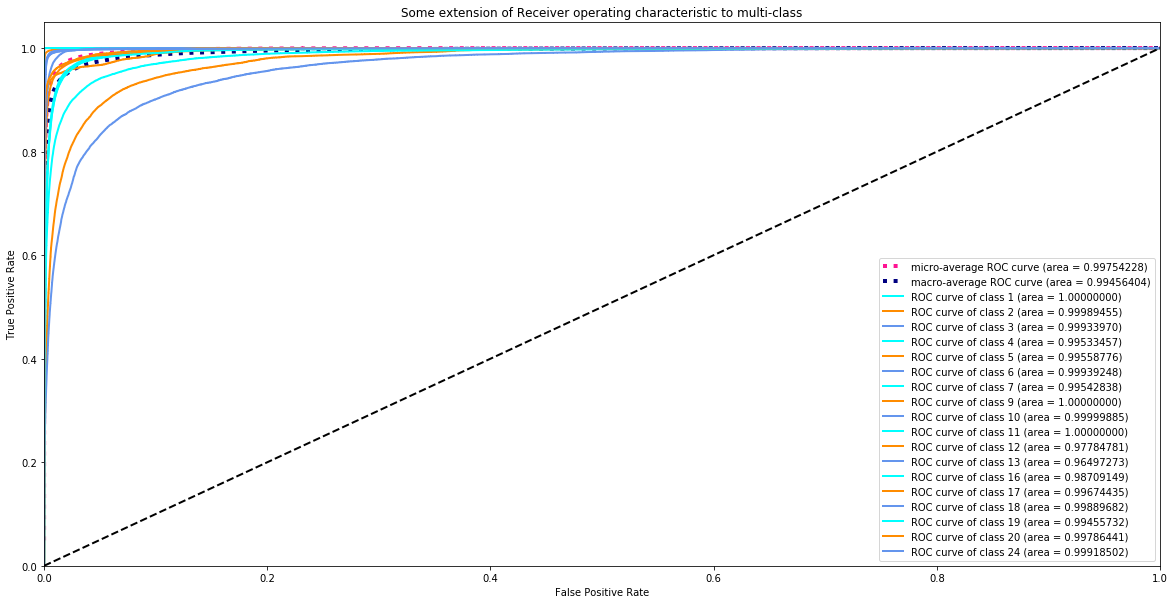

In [3]:
# Plot all ROC curves
plt.figure(figsize=(20,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.8f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.8f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[classes[i]], tpr[classes[i]], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.8f})'
             ''.format(classes[i], roc_auc[classes[i]]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



In [5]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = classifier.predict(X_test)
y_test_non_category = [ np.argmax(t) for t in y_test ]
y_predict_non_category = [ np.argmax(t) for t in y_pred ]
conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)

In [24]:
print('\n'.join([''.join(['{:6}'.format(item) for item in row]) 
      for row in conf_mat]))

 38504     0     0     0     0     0     0     0     0     0     0     0     1     0     0     0     0     0
   299 36426   227     0     0     0     0     0     0     0     0     0    82     0     0     4     0     0
   689   131 37078     1     0     0     0     0     0     0     5     3    14    42    16     7     0     0
  3943    10     7 42748     2    13   803     0     0     0    85   104    25     0     1     7     3     1
  1664     0     2   175 17430    45   133     0     0     0    63    42     4     0     1     2    46    33
   794     0     0   101     3 31809    88     0     0     0    30    51    37     0     0     1     3     3
  3330     5     2  1791    97   145 32076     0     0     0    72    80     3     2     2     7     0     9
     0     0     0     0     0     0     0 16726     0     0     0     0     0     0     0     3     0     0
     7     1    10     1     0     0     2     0 61936     0     5     0     3     2     0    20     0     0
     1     0     0 